# Week 4 - Evaluating Binary Classification Models 

In [ ]:
%autosave 1

Autosaving every 1 seconds


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

## Prep

We are basing Week4 on what we did during Week 3.

In [ ]:
## Prep

In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
    
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head().T

--2022-10-04 07:11:08--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘WA_Fn-UseC_-Telco-Customer-Churn.csv’

WA_Fn-UseC_-Telco-C 100%[===================>] 954.59K  --.-KB/s    in 0.02s   

2022-10-04 07:11:09 (58.8 MB/s) - ‘WA_Fn-UseC_-Telco-Customer-Churn.csv’ saved [977501/977501]



,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)



## 4.2 Accuracy and Dummy Model

* Evaluate the model on different thresholds
* Check the accurancy of dummy baselines

In [ ]:
# As we covered in previous week's notebook, the 'accuracy' of out model when the threshold is 0.5 can be calculated as below. 
y_val_pred = model.predict_proba(X_val)[:, 1]
churn_decision_val = (y_val_pred >= 0.5)
(y_val == churn_decision_val).mean()

0.8034066713981547

In [ ]:
# Now let's calculate the precision for a series of thresholds to see if there are other thresholds that will give us a higher precision value.
threasholds = np.linspace(0, 1, 21)
scores = []

for t in threasholds:
    churn_decision_val = (y_val_pred >= t)
    mean = (churn_decision_val == y_val).mean()
    scores.append(mean)
    print("%.2f  %.3f" % (t, mean))
    
# Looks like 0.5 is the threshold that gives the highest precision for this particular model.

0.00  0.274
0.05  0.509
0.10  0.591
0.15  0.666
0.20  0.710
0.25  0.739
0.30  0.760
0.35  0.772
0.40  0.785
0.45  0.793
0.50  0.803
0.55  0.801
0.60  0.795
0.65  0.786
0.70  0.766
0.75  0.744
0.80  0.735
0.85  0.726
0.90  0.726
0.95  0.726
1.00  0.726


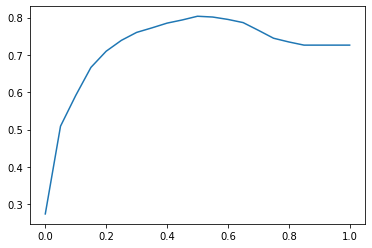

In [ ]:
plt.plot(threasholds, scores)

In [ ]:
# There's actually a function in sklearn called accuracy_score that we can use instead of calculating it using mean()
# Let's repeat what we did above using sklearn's function.

from sklearn.metrics import accuracy_score

threasholds = np.linspace(0, 1, 21)
scores = []

for t in threasholds:
    churn_decision_val = (y_val_pred >= t)
    s = accuracy_score(y_val, churn_decision_val)
    scores.append(s)
    print("%.2f  %.3f" % (t, s))

0.00  0.274
0.05  0.509
0.10  0.591
0.15  0.666
0.20  0.710
0.25  0.739
0.30  0.760
0.35  0.772
0.40  0.785
0.45  0.793
0.50  0.803
0.55  0.801
0.60  0.795
0.65  0.786
0.70  0.766
0.75  0.744
0.80  0.735
0.85  0.726
0.90  0.726
0.95  0.726
1.00  0.726


What's interesting above is the accuracy for threshold 1.0 is 72.6%, compared to the real target values of the validation dataset. That means even if we consider the model prediction has to be 100% (P(X)= 1.0) for a customer to churn, the model accuracy is 72.6%. This is just 9% difference from the best accuracy we got (81.5 - 72,6).

In [ ]:
# Quick query to remind us how many customers we have in int he val dataset
len(y_val)

1409

In [ ]:
# then see how many did the model predicted as 1.0.
from collections import Counter
Counter(y_val_pred >= 1.0)

Counter({False: 1409})

Looks like none of the probability values were 1.0. So with 100% of the prediction probabilities says there are no customers churn, still the model gives a 72.6% accuracy. Hmmm!

Btw, the **Dummy Model** is the scenario the calculation is done based on threashold = 1.0.

In [ ]:
# Check how many customers churned vs. didn't churn in the validation dataset.

Counter(y_val )


Counter({0: 1023, 1: 386})

In [ ]:
1 - y_val.mean()  #gives 0.7260468417317246

# This is exactly what we get as the accurancy when threshold is 1.0.

0.7260468417317246

This means we have "class imbalance" in the dataset. This means there are more non-churn customers in the dataset than churned customers. In the validation dataset, the non-churn: churn ratio is 3:1
When there is a class imbalance, model 'accurancy' can be misleading. There are other better ways to evaluate models when the dataset has class imbalance.

## 4.3 Confusion Table
* Is a way of looking at different types correct and incorrect decisions our binary classification model makes
* Is a summarisation in tabular form

In [ ]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)
t=0.5
predict_positive = (y_val_pred >= t)
predict_negative = (y_val_pred < t)

tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

print(tp, tn, fp, fn)

210 922 101 176


In [ ]:
# We can put this in a confusion matrix using numpy, as below.

confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[922, 101],
       [176, 210]])

In [ ]:
(confusion_matrix/confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

Based on the values in the confusion matrix we can then derive a few more metrics such as Precision and Recall, and ROC Curve.

## 4.4 Precision and Recall

In [ ]:
(tp + tn) / (tp + tn + fp + fn)

0.8034066713981547

### Precision
Precision is the fraction of correct positive predictions, out of all the positive predictions (*Note! not the actual positive observations*).
$\dfrac{TruePositives}{AllPositivePredictions}$

In [ ]:
(tp / (tp + fp)).round(2)

0.68

Out of all the positive predictions, we only got 68% ✅ of them correct. There are 32% ❌ incorrect predictions. 😞

### Recall 
Recall is the fraction of correctly predicted positives, out of the total of positive predictions.

$\dfrac{TruePositives}{TotalActualPositivePredictions}$

In [ ]:
r = (tp/ (tp + fn))
r

0.5440414507772021

Out of all the total actual positive observations, the model only predicted 54% ✅ of them as *correct*. That also means it got 46% ❌ of the predictions *incorrect*.

Remember, the accuracy of our model came out as 80% 🤡.

This shows us 'accuracy' is not a good metric at all when there's class imbalance in the data set. Precision and Recall are better metrcs to use in such situations as they can give us a better view of how good/bad the model is.

### F1 Score

Precision and recall are conflicting - when one grows, the other goes down. Therefore we often combine them into the F1 score - a metric that takes into account both.

This is the formula for computing $F_1$:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

## 4.5 Receiver Operating Characteristics (ROC) Curve
* Used during WWII for evaluating the strength of radar detectors. It shows how the model behavioves with different thresholds. 

There are two rates:
  * FPR - False Positive Rate, out of the total of actual negatives (that's tn + fp). We want to minimize this rate!
  * TPR - True Positive Rate, out of the total of actual positives (that's tp + fn) . We want to maximize this rate!

In [ ]:
fpr = fp / (tn + fp)
fpr

0.09872922776148582

In [ ]:
tpr = tp / (tp + fn)
tpr

0.5440414507772021

Note: **tpr** is _same as_ the **recall**.

In [ ]:
f'tpr={tpr},  recall={r}'

'tpr=0.5440414507772021,  recall=0.5440414507772021'

We got the above ROC values for threshold 0.5.

Now let's calculate the ROC values for a series of thresholds, between 0.0 and 1.0.


In [ ]:
thresholds = np.linspace(0, 1, 101)
scores = []

for t in thresholds:
  actual_positive = (y_val == 1)
  actual_negative = (y_val == 0)

  predict_positive = (y_val_pred >= t)
  predict_negative = (y_val_pred < t)

  tp = (predict_positive & actual_positive).sum()
  tn = (predict_negative & actual_negative).sum()

  fp = (predict_positive & actual_negative).sum()
  fn = (predict_negative & actual_positive).sum()

  scores.append((t, tp, fp, fn, tn))

scores

[(0.0, 386, 1023, 0, 0),
 (0.01, 385, 913, 1, 110),
 (0.02, 384, 830, 2, 193),
 (0.03, 383, 766, 3, 257),
 (0.04, 381, 715, 5, 308),
 (0.05, 379, 685, 7, 338),
 (0.06, 377, 661, 9, 362),
 (0.07, 372, 641, 14, 382),
 (0.08, 371, 613, 15, 410),
 (0.09, 369, 580, 17, 443),
 (0.1, 366, 556, 20, 467),
 (0.11, 365, 528, 21, 495),
 (0.12, 365, 509, 21, 514),
 (0.13, 360, 477, 26, 546),
 (0.14, 355, 453, 31, 570),
 (0.15, 351, 435, 35, 588),
 (0.16, 347, 419, 39, 604),
 (0.17, 346, 401, 40, 622),
 (0.18, 344, 384, 42, 639),
 (0.19, 338, 369, 48, 654),
 (0.2, 333, 356, 53, 667),
 (0.21, 330, 341, 56, 682),
 (0.22, 323, 322, 63, 701),
 (0.23, 320, 313, 66, 710),
 (0.24, 316, 304, 70, 719),
 (0.25, 309, 291, 77, 732),
 (0.26, 304, 281, 82, 742),
 (0.27, 303, 270, 83, 753),
 (0.28, 295, 256, 91, 767),
 (0.29, 291, 244, 95, 779),
 (0.3, 284, 236, 102, 787),
 (0.31, 280, 230, 106, 793),
 (0.32, 278, 226, 108, 797),
 (0.33, 276, 221, 110, 802),
 (0.34, 274, 212, 112, 811),
 (0.35000000000000003, 272,

In [ ]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

In [ ]:
# Having a look at each 10th record, just to verify if data is populated correctly
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,366,556,20,467
20,0.2,333,356,53,667
30,0.3,284,236,102,787
40,0.4,249,166,137,857
50,0.5,210,101,176,922
60,0.6,150,53,236,970
70,0.7,76,20,310,1003
80,0.8,13,1,373,1022
90,0.9,0,0,386,1023


In [ ]:
# Now calculate tpr and fpr, and add them under new columns

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.tn + df_scores.fp)


In [ ]:
# Having a look at each 10th record, just to verify if data is populated correctly
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,556,20,467,0.948187,0.543500
20,0.2,333,356,53,667,0.862694,0.347996
30,0.3,284,236,102,787,0.735751,0.230694
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,210,101,176,922,0.544041,0.098729
60,0.6,150,53,236,970,0.388601,0.051808
70,0.7,76,20,310,1003,0.196891,0.019550
80,0.8,13,1,373,1022,0.033679,0.000978
90,0.9,0,0,386,1023,0.000000,0.000000


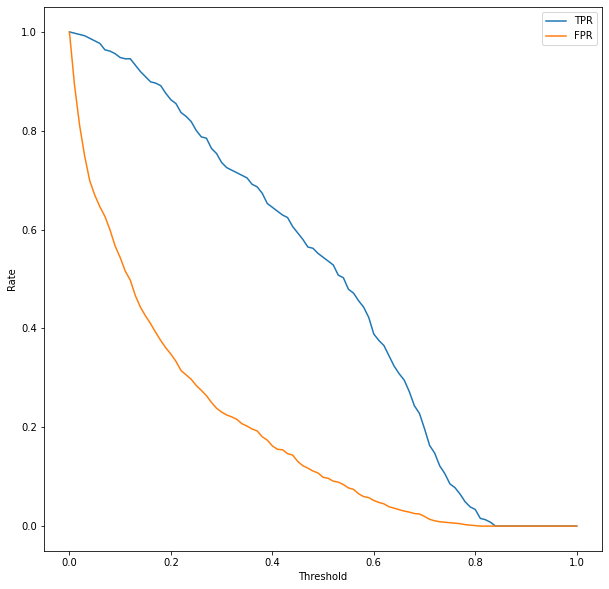

In [ ]:
# Now let's plot the above tpr and fpr values
plt.figure(figsize=(10,10))
plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.legend()


We can interpret the above plot as below:
* When threashold (t) is 0.0 (means all customers are predicted as chruning), both rates are at their highest point.
* As t increases (means some customers are predicted as not-churning), then the tpr starts to decline gradually. fpr is also declining, at a faster rate that tpr.
* Both rates reach 0.0 at threashold ~0.83.
* After ~0.83, both rates remain at 0.0.

We cannot come to a conclusion if our model is good or bad by just looking at the above plot. We need a baseline. A Random Model will give us that. 

### Random Model
Here we use a completely random set of prediction values (hence we call this a Random Model) so we can use a plot based on its ROC values as a baseline to better understand the actual performance of our model.

In [ ]:
# Here we use randomly generated values as predictions, pretending as if we got them from our model.
np.random.seed(1)
y_rand_pred = np.random.uniform(0, 1, size=len(y_val))
y_rand_pred.round(3)

array([0.417, 0.72 , 0.   , ..., 0.774, 0.334, 0.089])

In [ ]:
# Since y_rand_pred contains all randomly generated values, the accuracy of it will be ~50% (same a rolling a die).
# You might wonder how we can get a ~50% accuracy because how 0's and 1's in y_val has a big influence. 
# Yes, but remember y_val is also from a shuffled dataset so its values are also expected to be in an evenly ditributed manner.
((y_rand_pred >= 0.5) == y_val).mean()

0.5017743080198722

In [ ]:
# Let's create a function wrapping the fpr, tpr calculation and get it to return a dataframe.

def tpr_fpr_dataframe(y_val, y_pred, thresholds = np.linspace(0, 1, 101)):
  scores = []

  for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))


  headers = ['threshold', 'tp', 'fp', 'fn', 'tn']
  df_scores = pd.DataFrame(scores, columns = headers)

  df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
  df_scores['fpr'] = df_scores.fp / (df_scores.tn + df_scores.fp)

  return df_scores

In [ ]:
df_random = tpr_fpr_dataframe(y_val, y_rand_pred)
df_random[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


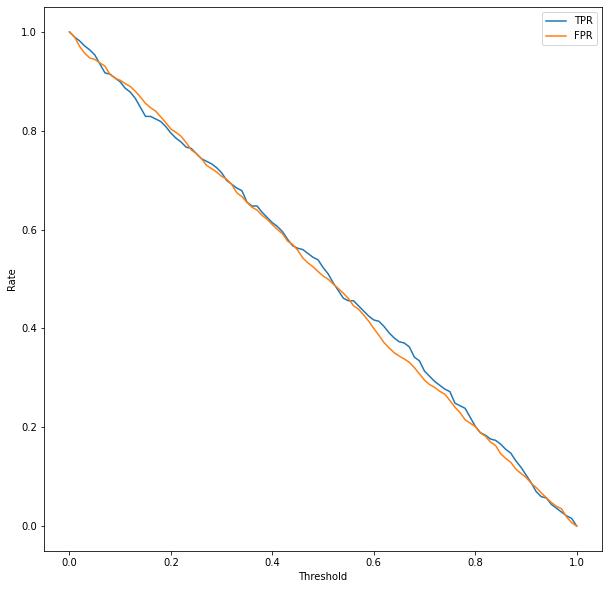

In [ ]:
# Plotting the roc rates from the random model
plt.figure(figsize=(10, 10))
plt.plot(df_random.threshold, df_random.tpr, label='TPR')
plt.plot(df_random.threshold, df_random.fpr, label='FPR')
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.legend()

### Preamble for the Ideal Model section

This is to help understand what we are trying to achieve with the ideal model.

What qualifies an ideal scenario?
* actual targtes (e.g. y_val) should be sorted in ascending order (i.e. 0's followed by 1's)
* predictions from the model (i.e. y_pred) should be in ascending order.

In [ ]:
# say we have 3 churned customers and they appear together at the end of the scale
sn_y_val = np.repeat([0,1], [7,3])
sn_y_val

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
# we fabricate some predictions in ascending order
sn_y_pred = np.linspace(0, 1, len(sn_y_val))
sn_y_pred

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [ ]:
# what is the accuracy with t=0.5
sn_t=0.5
sn_churn_decision  = sn_y_pred >= sn_t
(sn_churn_decision == sn_y_val).mean()

# it's 80%. In an ideal scenario we should be able to achieve 100% accuracy. 

0.8

In [ ]:
# So what should be the threshold to get 100% correct predictions?
sn_t = 1 - (sn_y_val == 1).mean()
sn_t

0.7

In [ ]:
# Let's try it and see if we get 100% accurancy.
sn_churn_decision = sn_y_pred >= sn_t
(sn_churn_decision == sn_y_val).mean()

# yes!!

1.0

### Ideal Model
* Ideal model helps us to plot a curve for the perfect scenario
* This is another type of baseline.
* The prediction values from the model is sorted in ascending order.


In [ ]:
# Here are are going to sort the values y_val with 0's followed by 1's. What we 
# are trying to do here is to remove the shuffuling of the actual target values, 
# so all the 'churned' customers apper together at the end of the scale. We call
# the new object y_ideal. Remember, these are ideal 'actuals', not predictions
# from the model.
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
print (num_neg, num_pos)
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

1023 386


array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
# Then we fabricate predictions. These are in accending order with 0.5 as the median.
y_ideal_pred = np.linspace(0, 1, len(y_val))
y_ideal_pred

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00])

In [ ]:
((y_ideal_pred >= 0.726 ) == y_ideal).mean()

1.0

In [ ]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

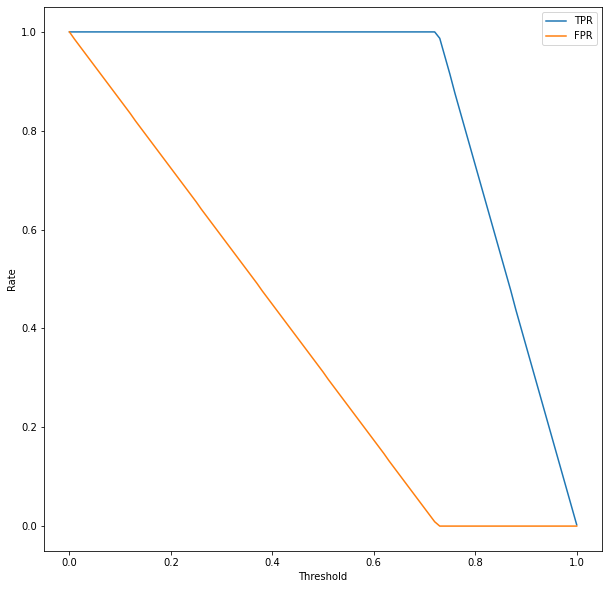

In [ ]:
# Plotting the roc rates from the random model
plt.figure(figsize=(10, 10))
plt.plot(df_ideal.threshold, df_ideal.tpr, label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, label='FPR')
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.legend()

### Putting everything together



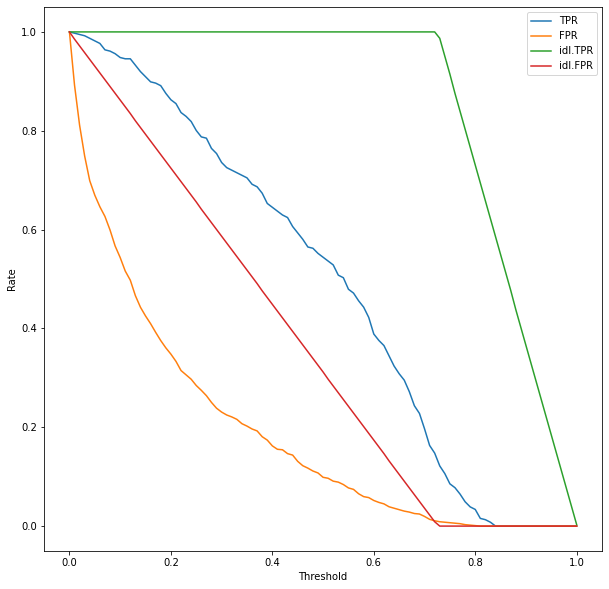

In [ ]:

plt.figure(figsize=(10,10))
plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')

# plt.plot(df_random.threshold, df_random.tpr, label='rnd.TPR')
# plt.plot(df_random.threshold, df_random.fpr, label='rnd.FPR')

plt.plot(df_ideal.threshold, df_ideal.tpr, label='idl.TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, label='idl.FPR')

plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.legend()

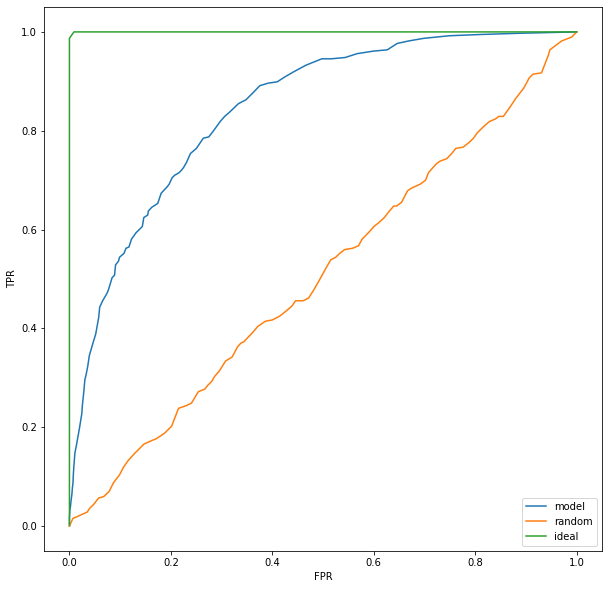

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot(df_random.fpr, df_random.tpr, label='random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

So our aim should be:
* to get the model curl as close as possible to the green line. 

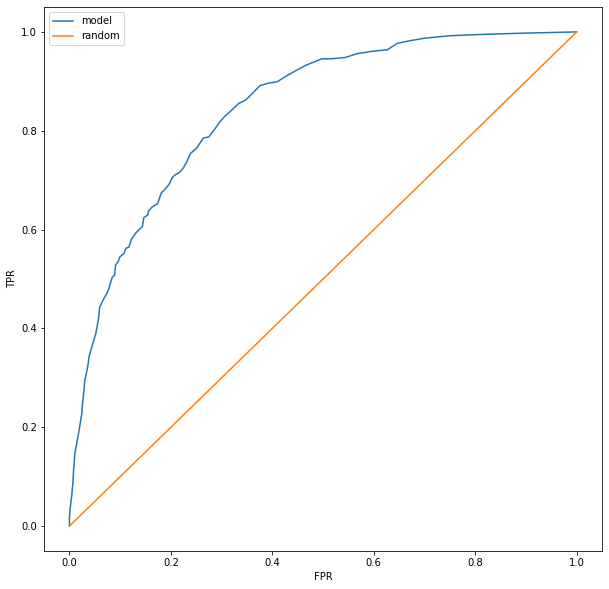

In [ ]:
# Optional: We can further simplify the plot by removing the ideal line as we know it should look like, and makesing the random line a straight line.
plt.figure(figsize=(10,10))
plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot([0, 1], [0, 1], label='random')
# plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

Btw, sklearn has a convenience function to calculate the fpr, tpr and threshold. So no need to do it yourself.

In [ ]:
from sklearn.metrics import roc_curve
fprs, tprs, thresholds = roc_curve(y_val, y_val_pred)

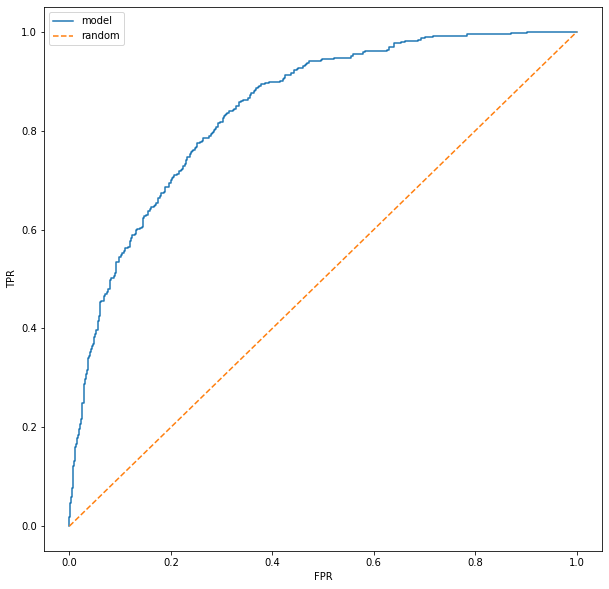

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(fprs, tprs, label='model')
plt.plot([0, 1], [0, 1], label='random', linestyle='--')
# plt.plot(fprs, tprs, label='ideal')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

What's most interesting is a metric based on the ROC curve called the 'Area Under the Curv (AUC)'. A good metric for evaluative binary classification models.

## 4.6 ROC Area Under the Curve (AUC)



In [ ]:
from sklearn.metrics import auc

In [ ]:
auc(fprs, tprs) # with the fpr and tpr calculated using sklearn's roc_curve()

0.8438530381535563

In [ ]:
auc(tprs, fprs)

0.1561469618464437

In [ ]:
auc(df_scores.fpr, df_scores.tpr) # with the fpr and tpr we canculated manually

0.8438732975754537

In [ ]:
auc(df_ideal.fpr, df_ideal.tpr) # with the fpr and tpr from the ideal model

0.9999430203759136

In [ ]:
auc(df_random.fpr, df_random.tpr) # with the fpr and tpr from the random model

0.5060233793728696

In [ ]:
# Here's a shortcut function from sklearn to calculate the roc and then auc in one go.
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_val, y_val_pred)
# the result is identical to what was calculated above at the begining of this section

0.8438530381535563

Lexy says "AUC is telling is tha P(selecting a positive example) is greater than P(selecting a negative example)"  🥴 What the hell does that mean?


In [ ]:
neg = y_val_pred[y_val == 0]
pos = y_val_pred[y_val == 1]
# len(neg), len(pos)

In [ ]:
import random

n=10000
success = 0

for i in range(n):
  pos_idx = random.randint(0, len(pos) - 1)
  neg_idx = random.randint(0, len(neg) - 1)
  if(pos[pos_idx] > neg[neg_idx]):
    success += 1

success/ n

0.8446

In [ ]:
# Same with numpy, in a more elegant manner
n = 10000
pos_idx = np.random.randint(0, len(pos), size=n)
neg_idx = np.random.randint(0, len(neg), size=n)
(pos[pos_idx] > neg[neg_idx]).mean()

0.8352

## 4.7 Cross Validation
* Evaluating the same model on different subsets of data using K-fold
* Getting the average prediction and the spread within predictions
* We use this for parameter tuning

K is the number of splits.
If K=3,   split 1 and 2 is for training.. and split 3 for validation. Do the same with the rest of the combinations.

For each we calculate AUC and then we get their mean and sd.
sd will show how stable the model is.


In [ ]:
def train(df, y_true):
  dicts = df[categorical + numerical].to_dict(orient='records')

  dv = DictVectorizer(sparse=False)
  X_train = dv.fit_transform(dicts)

  model = LogisticRegression(solver='liblinear', max_iter=1000)
  model.fit(X_train, y_true)

  return dv, model

In [ ]:
dv, model = train(df_train, y_train)

In [ ]:
def predict(df, dv, model):
  dicts = df[categorical + numerical].to_dict(orient='records')

  X = dv.transform(dicts)
  y_pred = model.predict_proba(X)[:, 1]

  return y_pred

In [ ]:
y_pred = predict(df_val, dv, model)

In [ ]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tqdm.auto import tqdm

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

# train_idx, val_idx = next(kfold.split(df_full_train))
# len(train_idx), len(val_idx)

scores = []

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
  df_train = df_full_train.iloc[train_idx]
  df_val = df_full_train.iloc[val_idx]

  y_train = df_train.churn.values
  y_val = df_val.churn.values

  # del df_train['churn']
  # del df_val['churn']

  dv, model = train(df_train, y_train)
  y_pred = predict(df_val, dv, model)

  auc = roc_auc_score(y_val, y_pred)
  scores.append(auc)
scores

0it [00:00, ?it/s]

[0.8493392490816277,
 0.8413366336633662,
 0.8590269587894291,
 0.8330260883877869,
 0.8242555831265509,
 0.8416250416250417,
 0.8437154021491371,
 0.8223355471220746,
 0.8450570623981029,
 0.8611811367685119]

In [ ]:
print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.842 +- 0.012


LogisticRegression() has a parameter called `C` which is used to control the regularisation. Here, lower the C value, stronger the regularisation! Default is 1.0.

Let's rewrite our train() function with C as a parameter.

In [ ]:
def train(df, y_true, C=1.0):
  """ Improved train function with C regularizer """

  dicts = df[categorical + numerical].to_dict(orient='records')

  dv = DictVectorizer(sparse=False)
  X_train = dv.fit_transform(dicts)

  model = LogisticRegression(C=C, solver='liblinear', max_iter=1000)
  model.fit(X_train, y_true)

  return dv, model

In [ ]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
  scores = []

  kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

  for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.churn.values
    y_val = df_val.churn.values

    dv, model = train(df_train, y_train, C=C)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
  print('C=%s\tmean=%.3f\tsd = +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001	mean=0.825	sd = +- 0.013
C=0.01	mean=0.839	sd = +- 0.009
C=0.1	mean=0.841	sd = +- 0.008
C=0.5	mean=0.841	sd = +- 0.007
C=1	mean=0.841	sd = +- 0.007
C=5	mean=0.841	sd = +- 0.007
C=10	mean=0.841	sd = +- 0.007


In [ ]:
# Select the best C from the above and use it to train the model with df_full_train 
# and validate with the df_test.

C=1.0
dv, model = train(df_full_train, df_full_train.churn.values, C=C)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc


0.8579400803839363

❗ When should I use cross validation (K-fold) vs. usual validation (train/val)?

When the dataset you are working with is small, then use cross validation with say 10 k-fold splits. This allows us to train and validate the model with different data combinations and then pick the best using the mean and sdev.

When the dataset is large, then we can either stick to the usual train/val split or use a lower k-fold, say 3 n_splits.
